In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [31]:
data = pd.read_csv('./data/dataset_cal.csv')

S1 = data.loc[data['Subject'] == 'S1']
S1['Gender'].replace(' f', 0, inplace=True)
S1['Gender'].replace(' m', 1, inplace=True)

remove = ["Subject", "Activity"]
features = [column for column in list(data.columns) if column not in remove]
data['Gender'].replace(' f', 0, inplace=True)
data['Gender'].replace(' m', 1, inplace=True)
data

c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,label,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,...,wrist_TEMP_median,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Subject
0,49.611369,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,...,32.155,78.0,1,34,182.0,3,6,0,0,S1
1,50.323992,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,...,32.150,78.0,1,34,182.0,3,6,1,0,S1
2,52.708336,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,...,32.150,78.0,1,34,182.0,3,6,0,0,S1
3,55.640794,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,...,32.140,78.0,1,34,182.0,3,6,0,0,S1
4,57.658406,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,...,32.155,78.0,1,34,182.0,3,6,0,0,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,75.475622,0.894839,0.011158,-0.214601,-0.008444,0.712193,-0.710205,0.671631,0.156250,0.956780,...,34.015,79.0,1,28,183.0,2,5,1,2,S15
64693,77.524511,0.895650,0.014221,-0.217153,0.000331,0.364633,-0.454102,-0.193848,0.840088,0.943969,...,34.000,79.0,1,28,183.0,2,5,0,2,S15
64694,78.714945,0.893826,0.022179,-0.202851,0.021754,-0.179085,-0.669678,-0.124756,0.505371,0.943969,...,34.000,79.0,1,28,183.0,2,5,1,2,S15
64695,80.413954,0.896889,0.022090,-0.203860,-0.013849,0.442674,-0.351074,-0.044678,0.890381,0.937724,...,34.000,79.0,1,28,183.0,2,5,0,2,S15


In [32]:
data.drop(columns = ['WEIGHT','Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Activity','Subject' ], inplace = True)
S1.drop(columns = ['WEIGHT','Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Activity','Subject' ], inplace = True)

c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
y = data['label']
X = data.drop(columns = ['label'],inplace = False)
S1_y = S1['label']
S1_X = S1.drop(columns = ['label'],inplace = False)
S1_y.astype(np.float32)
S1_X.astype(np.float32)

,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,wrist_BVP_mean,...,chest_ACC_z_median,chest_ECG_median,chest_Resp_median,wrist_ACC_x_median,wrist_ACC_y_median,wrist_ACC_z_median,wrist_EDA_median,wrist_BVP_median,wrist_TEMP_median,Rpeaks
0,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,-7.619219,...,-0.3698,-0.003960,1.320648,-0.765625,-0.078125,0.671875,4.716672,-2.425,32.154999,0.0
1,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,7.464063,...,-0.3742,-0.037857,-2.276611,-0.765625,-0.078125,0.671875,4.693611,15.590,32.150002,1.0
2,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,-19.324688,...,-0.3374,-0.026161,0.612640,-0.828125,-0.406250,0.296875,4.710907,-14.910,32.150002,0.0
3,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,10.776719,...,-0.2516,-0.044014,0.433350,-1.000000,-0.125000,0.156250,4.748061,14.345,32.139999,0.0
4,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,15.263047,...,-0.2472,-0.037651,-0.827789,-1.000000,-0.078125,0.140625,4.764075,38.125,32.154999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,0.724237,-0.072968,-0.607304,0.015020,-1.207002,-0.529297,0.000977,0.864258,2.676020,1.094062,...,-0.6082,-0.073929,-2.778625,-0.531250,0.000000,0.859375,2.676661,16.865,34.389999,1.0
4599,0.807758,-0.066048,-0.446783,0.004991,5.118846,-0.721924,0.005859,0.665771,2.688992,37.669220,...,-0.4227,-0.062050,6.322479,-0.671875,-0.070312,0.718750,2.688191,50.770,34.389999,0.0
4600,0.901212,-0.016409,-0.078395,-0.032977,0.019999,-0.387207,0.879395,0.297852,2.761859,-41.876953,...,-0.1264,-0.105606,-1.041412,-0.375000,0.851562,0.312500,2.740079,-25.340,34.380001,1.0
4601,0.896119,-0.086879,-0.203028,0.007409,-2.420330,-0.422607,0.950195,0.303955,3.156301,5.619297,...,-0.2116,-0.056259,-2.278137,-0.429688,0.890625,0.328125,3.198100,-4.935,34.369999,0.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 34) (38818,) (25879, 34) (25879,)


,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,wrist_BVP_mean,...,chest_ACC_z_median,chest_ECG_median,chest_Resp_median,wrist_ACC_x_median,wrist_ACC_y_median,wrist_ACC_z_median,wrist_EDA_median,wrist_BVP_median,wrist_TEMP_median,Rpeaks
0,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,-7.619219,...,-0.3698,-0.003960,1.320648,-0.765625,-0.078125,0.671875,4.716672,-2.425,32.154999,0.0
1,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,7.464063,...,-0.3742,-0.037857,-2.276611,-0.765625,-0.078125,0.671875,4.693611,15.590,32.150002,1.0
2,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,-19.324688,...,-0.3374,-0.026161,0.612640,-0.828125,-0.406250,0.296875,4.710907,-14.910,32.150002,0.0
3,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,10.776719,...,-0.2516,-0.044014,0.433350,-1.000000,-0.125000,0.156250,4.748061,14.345,32.139999,0.0
4,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,15.263047,...,-0.2472,-0.037651,-0.827789,-1.000000,-0.078125,0.140625,4.764075,38.125,32.154999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.894839,0.011158,-0.214601,-0.008444,0.712193,-0.710205,0.671631,0.156250,0.956779,-3.816328,...,-0.2202,-0.039688,0.665283,-0.640625,0.695312,0.117188,0.951496,-9.900,34.014999,1.0
64693,0.895650,0.014221,-0.217153,0.000331,0.364633,-0.454102,-0.193848,0.840088,0.943969,-6.773203,...,-0.2168,-0.045273,-0.077820,-0.429688,-0.187500,0.859375,0.941887,-6.995,34.000000,0.0
64694,0.893826,0.022179,-0.202851,0.021754,-0.179085,-0.669678,-0.124756,0.505371,0.943969,8.764375,...,-0.2136,-0.029800,0.343323,-0.390625,-0.195312,0.882812,0.945090,10.175,34.000000,1.0
64695,0.896889,0.022090,-0.203860,-0.013849,0.442674,-0.351074,-0.044678,0.890381,0.937724,-6.218515,...,-0.2038,-0.056717,0.968933,-0.312500,-0.046875,0.937500,0.939965,-6.620,34.000000,0.0


In [34]:
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)
S1_X = np.expand_dims(S1_X, -1)

In [20]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
import matplotlib.pyplot as plt

model = Sequential() 
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1]))) 
model.add(Dropout(0.5)) 
model.add( LSTM(20,return_sequences=False)) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam')

In [22]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1)

Epoch 1/300
304/304 [==============================] - 7s 23ms/step - loss: 14.6267
Epoch 2/300
304/304 [==============================] - 7s 22ms/step - loss: 14.6292
Epoch 3/300
304/304 [==============================] - 7s 22ms/step - loss: 14.5360
Epoch 4/300
304/304 [==============================] - 7s 22ms/step - loss: 14.3463
Epoch 5/300
304/304 [==============================] - 7s 22ms/step - loss: 14.4632
Epoch 6/300
304/304 [==============================] - 7s 22ms/step - loss: 14.3823
Epoch 7/300
304/304 [==============================] - 7s 22ms/step - loss: 14.3005
Epoch 8/300
304/304 [==============================] - 7s 22ms/step - loss: 14.2352
Epoch 9/300
304/304 [==============================] - 7s 22ms/step - loss: 14.2201 
Epoch 10/300
304/304 [==============================] - 7s 22ms/step - loss: 14.0733
Epoch 11/300
304/304 [==============================] - 7s 22ms/step - loss: 14.0237
Epoch 12/300
304/304 [==============================] - 7s 22ms/step - lo

In [35]:
S1_X

array([[[ 8.51229572e-01],
        [-6.60207137e-02],
        [-3.69793142e-01],
        ...,
        [-2.42500000e+00],
        [ 3.21550000e+01],
        [ 0.00000000e+00]],

       [[ 8.53035000e-01],
        [-6.46534281e-02],
        [-3.72883428e-01],
        ...,
        [ 1.55900000e+01],
        [ 3.21500000e+01],
        [ 1.00000000e+00]],

       [[ 8.62127001e-01],
        [-6.36612861e-02],
        [-3.28340857e-01],
        ...,
        [-1.49100000e+01],
        [ 3.21500000e+01],
        [ 0.00000000e+00]],

       ...,

       [[ 9.01211573e-01],
        [-1.64092856e-02],
        [-7.83952866e-02],
        ...,
        [-2.53400000e+01],
        [ 3.43800000e+01],
        [ 1.00000000e+00]],

       [[ 8.96119431e-01],
        [-8.68789999e-02],
        [-2.03028285e-01],
        ...,
        [-4.93500000e+00],
        [ 3.43700000e+01],
        [ 0.00000000e+00]],

       [[ 8.72379142e-01],
        [-1.02528142e-01],
        [-1.44576143e-01],
        ...,
        

In [2]:
from sklearn.metrics import mean_absolute_error
S1_pred_LR = model.predict(S1_X)
mean_absolute_error(S1_pred_LR, S1_y)

NameError: name 'model' is not defined

NameError: name 'S1_pred_LR' is not defined

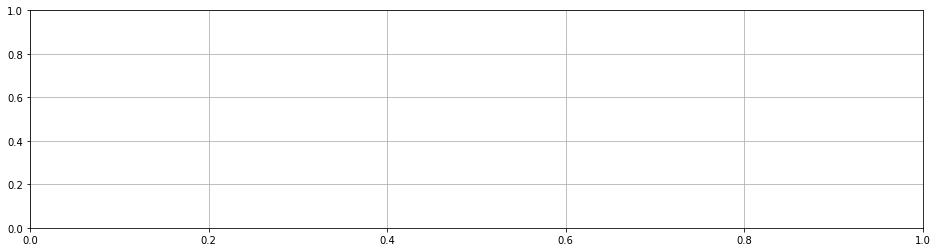

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( S1_pred_LR, label = 'prediected forest')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()